In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import mlflow
mlflow.set_tracking_uri("../mlruns")

In [3]:
def load_df(run_id: str) -> pd.DataFrame:
  return pd.read_json(mlflow.artifacts.download_artifacts(run_id=run_id, artifact_path="training_history.json"))

In [22]:
df_amiril_no_augment = load_df("af09b53839d34d72a3e966bfcafad758")
df_amiril_augment = load_df("20fe2f6ad6864c548432cc67a75a9dfe")
df_gustian_no_augment = load_df("096c416b4a30458da1bf44d2adb34939")
df_gustian_augment = load_df("9543420b19284cca80f03a38692df693")
df_mobilenet_no_augment = load_df("dcdc7b3486b24df7955289df8c95e600")
df_mobilenet_augment = load_df("da2b4dce6c0a4d81a80a7ba2fe2ff5f2")

In [51]:
def plot_df(ax, df, title):
  xvalues = np.arange(len(df.index))
  ax.plot(xvalues, df["accuracy"], label="Training")
  ax.plot(xvalues, df["val_accuracy"], label="Validation")
  ax.set_title(title)
  ax.legend(loc="lower right")

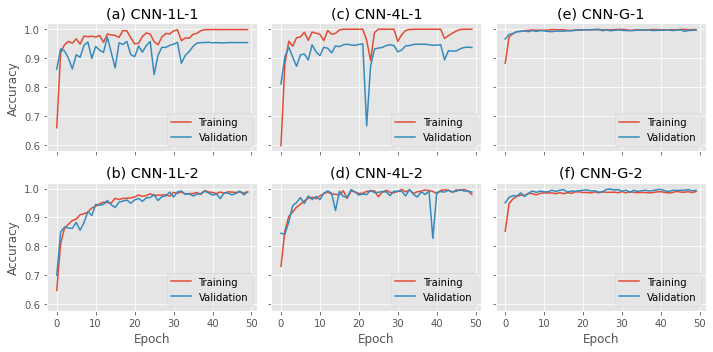

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5), sharey=True, sharex=True)

plot_df(axes[0, 0], df_gustian_no_augment, "(a) CNN-1L-1")
plot_df(axes[1, 0], df_gustian_augment, "(b) CNN-1L-2")
plot_df(axes[0, 1], df_amiril_no_augment, "(c) CNN-4L-1")
plot_df(axes[1, 1], df_amiril_augment, "(d) CNN-4L-2")
plot_df(axes[0, 2], df_mobilenet_no_augment, "(e) CNN-G-1")
plot_df(axes[1, 2], df_mobilenet_augment, "(f) CNN-G-2")

axes[0, 0].set_ylabel("Accuracy")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].set_xlabel("Epoch")
axes[1, 1].set_xlabel("Epoch")
axes[1, 2].set_xlabel("Epoch")

#plt.yscale("log")
fig.tight_layout()
plt.savefig('filename.png', dpi=300)
plt.show()